In [ ]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
# eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [ ]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
# eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Basic Materials

In [ ]:
# Basic Materials
for i in name.index:
  if "Basic Materials" not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)
#Year


In [ ]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
# eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [ ]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum())

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum())

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum())

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum())

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum())

0
0
0
0
0
0
0
0


In [ ]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [ ]:
# # Calculate NI
# ni = roa * ta

# Calculate Size
size = np.log(mv)

# # Calculate Leverage
# lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# # Calculate Net profit margin
# net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# # Calculate ROE
# roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
# ni.drop(ni.index[0], axis='index', inplace=True)
ocf.drop(ocf.index[0], axis='index', inplace=True)
size.drop(size.index[0], axis='index', inplace=True)
# lev.drop(lev.index[0], axis='index', inplace=True)
ppe.drop(ppe.index[0], axis='index', inplace=True)
liq.drop(liq.index[0], axis='index', inplace=True)
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True)
quick.drop(quick.index[0], axis='index', inplace=True)
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True)
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True)
dso.drop(dso.index[0], axis='index', inplace=True)
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True)
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True)
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True)
# net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True)
bep.drop(bep.index[0], axis='index', inplace=True)
# roe.drop(roe.index[0], axis='index', inplace=True)
roa.drop(roa.index[0], axis='index', inplace=True)
# eps.drop(eps.index[0], axis='index', inplace=True)
ccc.drop(ccc.index[0], axis='index', inplace=True)
gdp.drop(gdp.index[0], axis='index', inplace=True)
cpi.drop(cpi.index[0], axis='index', inplace=True)
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [ ]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

# cols=[]
# for j in range(len(ni.columns)):
#   for i in range(len(ni.index)):
#     if sales.iloc[i,j] < ni.iloc[i,j]:
#       cols.append(ni.columns[j])
#       break
# print(len(cols))


29
11


In [ ]:
roatb = roa.mean()
roatb = roatb.values
roatb = np.mean(roatb)
print(roatb)

# ROA > ROA TB --> Nhóm profit (có lợi nhuận ròng và dòng tiền dương từ hoạt động kd)
# ROA < ROA TB <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 96), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if roa.iloc[i,j] > roatb:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

0.06836300788653667
      POM.HM  MCC.HN  TDC.HM  DTL.HM  VXB.HN  NNC.HM  AAA.HM  MIM.HN  HVX.HM  C32.HM  HDA.HN  NKG.HM  THG.HM  GMX.HN  LCM.HM  AMC.HN  LAS.HN  DHM.HM  ITQ.HN  SPI.HN  TTZ.HN  FCM.HM  PVB.HN  NFC.HN  GTN.HM  VTH.HN  SFG.HM  PBP.HN  CSV.HM  PSE.HN  DCM.HM  KVC.HN  VAF.HM  PSW.HN  CTT.HN  PCE.HN  ACM.HN  PDB.HN  VPS.HM  BFC.HM  PMP.HN  PMB.HN  TPC.HM  BBS.HN  TKU.HN  SMC.HM  BPC.HN  NHC.HN  PMS.HN  DHA.HM  HMC.HM  VIS.HM  VID.HM  ALT.HN  LBM.HM  DTT.HM  SDN.HN  HT1.HM  BMC.HM  HPG.HM  DPM.HM  HCT.HN  DXV.HM  HCC.HN  CAP.HN  BCC.HN  BTS.HN  HAI.HM  TXM.HN  MCP.HM  STP.HN  VTV.HN  TPP.HN  KKC.HN  TBX.HN  HSG.HM  VGS.HN  SVI.HM  VHL.HN  HVT.HN  HOM.HN  DHC.HM  KMT.HN  BKC.HN  RDP.HM  TMX.HN  BXH.HN  GLT.HN  SDG.HN  HGM.HN  ACC.HM  SHI.HM  KSB.HM  CPC.HN  VBC.HN  TLH.HM
Year                                                                                                                                                                                                           

In [ ]:
# # NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# # NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

# target = pd.DataFrame(np.random.randn(11, 96), columns=size.columns, index = size.index)
# for i in range(len(size.index)):
#   for j in range(len(size.columns)):
#     if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
#       target.iloc[i,j] = 1
#     else:
#       target.iloc[i,j] = 0
# print(target.to_string())

In [ ]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
# data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
# data['Net profit margin'] = net_profit_margin.values.flatten()
# data['ROA'] = roa.values.flatten()
# data['ROE'] = roe.values.flatten()
# data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(1056, 19)


Size    Growth       PPE  Liquidity   Age  Quick ratio  \
Year Company                                                                
2010 POM.HM   29.308265  0.485906  0.161338   1.399731  11.0     0.717048   
     MCC.HN   25.514182  0.189628  0.244802   5.807324   4.0     4.116953   
     TDC.HM   26.969373  0.126613  0.114960   1.304055   8.0    -0.520114   
     DTL.HM   27.663278  0.180347  0.171619   1.360460   9.0     0.299504   
     VXB.HN   24.989636  0.032316  0.072736   2.146081   6.0     1.240023   
...                 ...       ...       ...        ...   ...          ...   
2020 SHI.HM   27.454505  0.115043  0.163421   1.153515  22.0     0.833158   
     KSB.HM   28.380360  0.006443  0.609096   1.699330  14.0     1.628770   
     CPC.HN   24.902307 -0.283488  0.060285   2.437753  18.0     0.138137   
     VBC.HN   25.851679 -0.075517  0.107645   1.157520  17.0     0.797156   
     TLH.HM   27.363069 -0.242980  0.059000   1.714915  19.0     0.797852   

              Inventory turnover ratio  FA turnover ratio  TA turnover ratio  \
Year Company                                                                   
2010 POM.HM                   4.051764           2.270428           1.461675   
     MCC.HN                   6.262846          10.374847           0.733156   
     TDC.HM                   0.283456           0.381327           0.363274   
     DTL.HM                   1.457883           2.507829           0.919518   
     VXB.HN                   3.318648           3.721260           1.238672   
...                                ...                ...                ...   
2020 SHI.HM                   5.635581          26.653662           1.189874   
     KSB.HM                  13.367986           7.946632           0.336944   
     CPC.HN                   1.803541          31.969790           1.501351   
     VBC.HN                   9.160806          43.793799           2.161616   
     TLH.HM                   3.441704          28.433544           1.472255   

                     DSO  Capital intensity  Expense of revenue ratio  \
Year Company                                                            
2010 POM.HM    97.303558           0.684146                  1.052063   
     MCC.HN    10.894706           1.363966                  1.694083   
     TDC.HM   299.468964           2.752745                  1.637708   
     DTL.HM    48.691028           1.087526                  1.340135   
     VXB.HN    93.007257           0.807316                  0.649694   
...                  ...                ...                       ...   
2020 SHI.HM    19.779427           0.840425                  0.168738   
     KSB.HM    14.984811           2.967851                  0.153973   
     CPC.HN    35.064111           0.666067                  0.483809   
     VBC.HN    19.286254           0.462617                  0.248742   
     TLH.HM    53.417807           0.679230                  0.509502   

              Operating margin       BEP         CCC       GDP       CPI  \
Year Company                                                               
2010 POM.HM           0.005026  0.007346  162.259426  6.423238  9.207466   
     MCC.HN           0.187835  0.137712   57.221063  6.423238  9.207466   
     TDC.HM           0.615973  0.223767  787.591459  6.423238  9.207466   
     DTL.HM          -0.002250 -0.002069  239.330413  6.423238  9.207466   
     VXB.HN          -0.046448 -0.057534  281.363179  6.423238  9.207466   
...                        ...       ...         ...       ...       ...   
2020 SHI.HM           0.019895  0.023672  100.072824  2.905836  3.220934   
     KSB.HM           0.073009  0.024600   62.480707  2.905836  3.220934   
     CPC.HN           0.054027  0.081114  238.253397  2.905836  3.220934   
     VBC.HN           0.030688  0.066335   70.361189  2.905836  3.220934   
     TLH.HM           0.060187  0.088611  126.990557  2.905836  3.220934   

              Interest rates  Target 

In [ ]:
data.dtypes

Size                        float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                         float64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [ ]:
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,941.000000,965.000000,984.000000,986.000000,1054.000000,984.000000,1056.000000,985.000000,984.000000,985.000000,984.000000,985.000000,985.000000,986.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,26.047249,0.197450,0.579258,2.496078,14.320683,1.388488,16.618936,792.492165,1.680877,139.225640,1.578271,1.308992,0.127753,0.109162,155.979310,6.001623,5.821202,3.797918,0.359848
std,1.505074,1.313338,5.001329,7.766492,8.646789,7.212992,83.636228,12152.554144,1.548522,612.669062,9.065557,5.498846,0.545858,0.126055,495.989884,1.131495,4.811130,2.945328,0.480183
min,23.014648,-0.992939,0.000392,0.252634,0.000000,-80.015676,0.132525,0.018774,0.003847,0.065824,0.096383,0.001716,-0.629930,-0.243151,-33.911007,2.905836,0.631201,-3.551709,0.000000
25%,24.948639,-0.063501,0.061478,1.110342,9.000000,0.459248,3.221277,2.705753,0.853708,20.563614,0.536855,0.535297,0.025056,0.034791,51.614787,5.421883,2.795824,2.294892,0.000000
50%,25.849014,0.062889,0.174094,1.541349,13.000000,0.830483,5.363643,7.110256,1.302478,46.006215,0.767767,0.821829,0.053735,0.075802,97.557884,6.240303,3.539628,4.825874,0.000000
75%,26.936719,0.195468,0.362743,2.468161,18.000000,1.503178,9.553572,19.093961,1.862711,98.934003,1.171361,1.103889,0.119179,0.142688,150.922356,6.812246,9.094703,5.814896,1.000000
max,32.553448,33.470906,150.450872,229.779305,60.000000,202.652705,1514.365994,227955.634155,10.375318,10262.768994,259.969489,141.803469,14.653269,1.045271,11896.689819,7.075789,18.677732,7.322258,1.000000


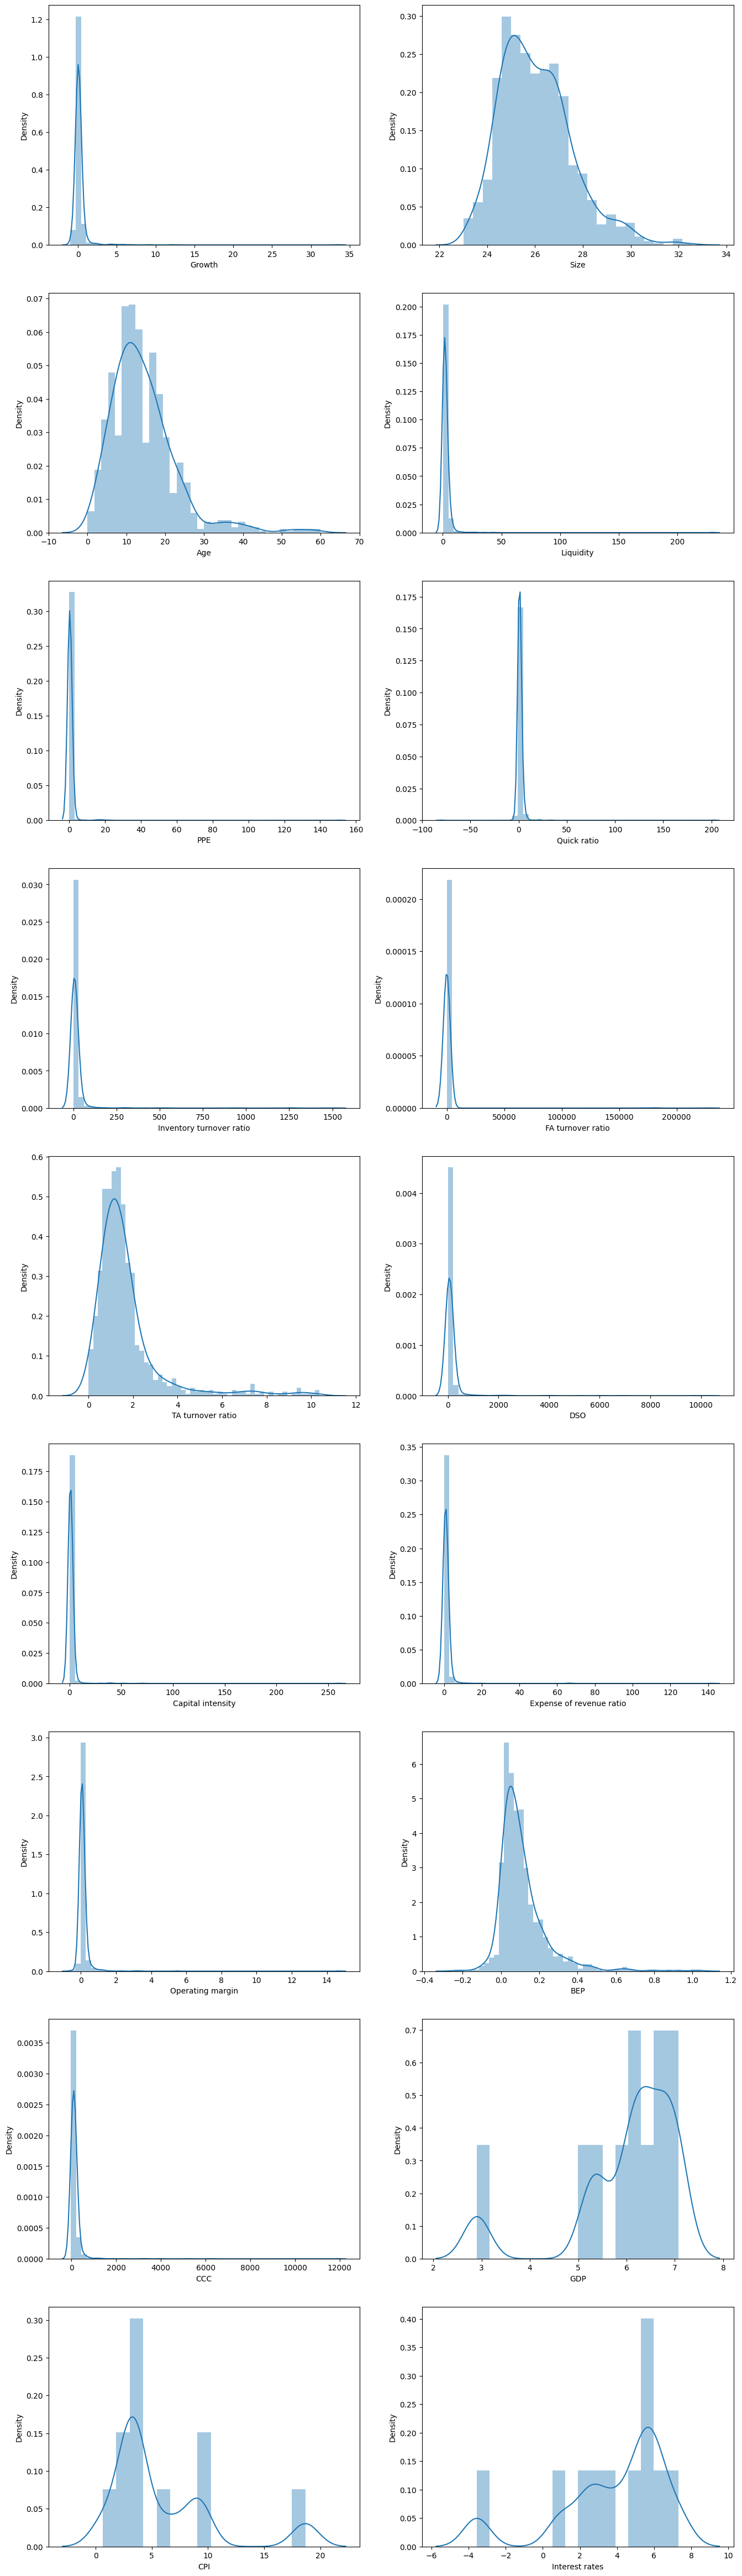

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP', 'CCC', 'GDP', 'CPI', 'Interest rates'])

In [ ]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,941.000000,965.000000,984.000000,986.000000,1054.000000,984.000000,1056.000000,985.000000,984.000000,985.000000,984.000000,985.000000,985.000000,986.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,26.047249,0.145722,0.428829,2.259319,14.320683,1.256188,12.244623,173.481016,1.680877,105.642465,1.244610,1.082983,0.107396,0.109162,132.578739,6.001623,5.821202,3.797918,0.359848
std,1.505074,0.562398,1.383013,2.565336,8.646789,2.109603,29.700377,2369.309203,1.548522,249.414270,2.630838,1.507846,0.207860,0.126055,184.052411,1.131495,4.811130,2.945328,0.480183
min,23.014648,-0.992939,0.000392,0.252634,0.000000,-20.250487,0.132525,0.018774,0.003847,0.065824,0.096383,0.001716,-0.629930,-0.243151,-33.911007,2.905836,0.631201,-3.551709,0.000000
25%,24.948639,-0.063501,0.061478,1.110342,9.000000,0.459248,3.221277,2.705753,0.853708,20.563614,0.536855,0.535297,0.025056,0.034791,51.614787,5.421883,2.795824,2.294892,0.000000
50%,25.849014,0.062889,0.174094,1.541349,13.000000,0.830483,5.363643,7.110256,1.302478,46.006215,0.767767,0.821829,0.053735,0.075802,97.557884,6.240303,3.539628,4.825874,0.000000
75%,26.936719,0.195468,0.362743,2.468161,18.000000,1.503178,9.553572,19.093961,1.862711,98.934003,1.171361,1.103889,0.119179,0.142688,150.922356,6.812246,9.094703,5.814896,1.000000
max,32.553448,4.137465,15.583244,25.795555,60.000000,23.027464,267.527620,37250.154598,10.375318,1977.232826,28.774944,17.805531,1.765328,1.045271,1643.948963,7.075789,18.677732,7.322258,1.000000


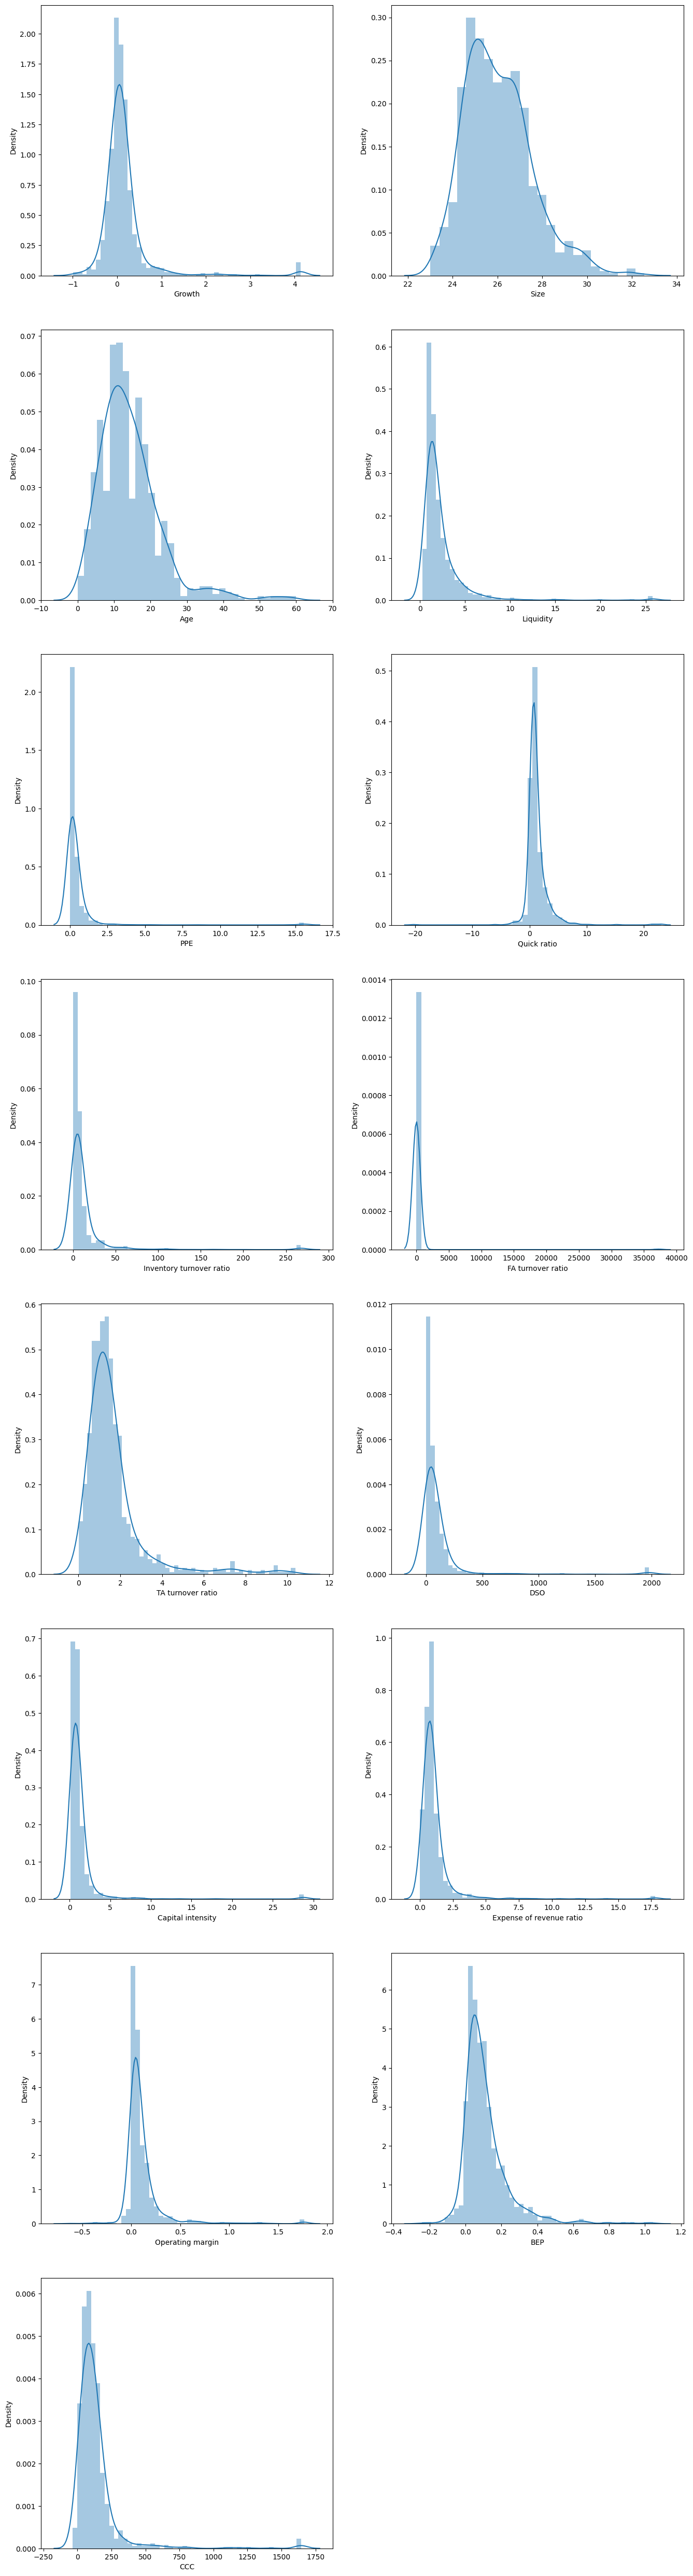

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP', 'CCC'])

In [ ]:
(data.isnull().sum()/1056*100).sort_values(axis=0, ascending=False)

Size                        10.890152
Growth                       8.617424
TA turnover ratio            6.818182
PPE                          6.818182
Quick ratio                  6.818182
Capital intensity            6.818182
Operating margin             6.723485
Expense of revenue ratio     6.723485
DSO                          6.723485
FA turnover ratio            6.723485
Liquidity                    6.628788
BEP                          6.628788
Age                          0.189394
Inventory turnover ratio     0.000000
CCC                          0.000000
GDP                          0.000000
CPI                          0.000000
Interest rates               0.000000
Target                       0.000000
dtype: float64

<Axes: >

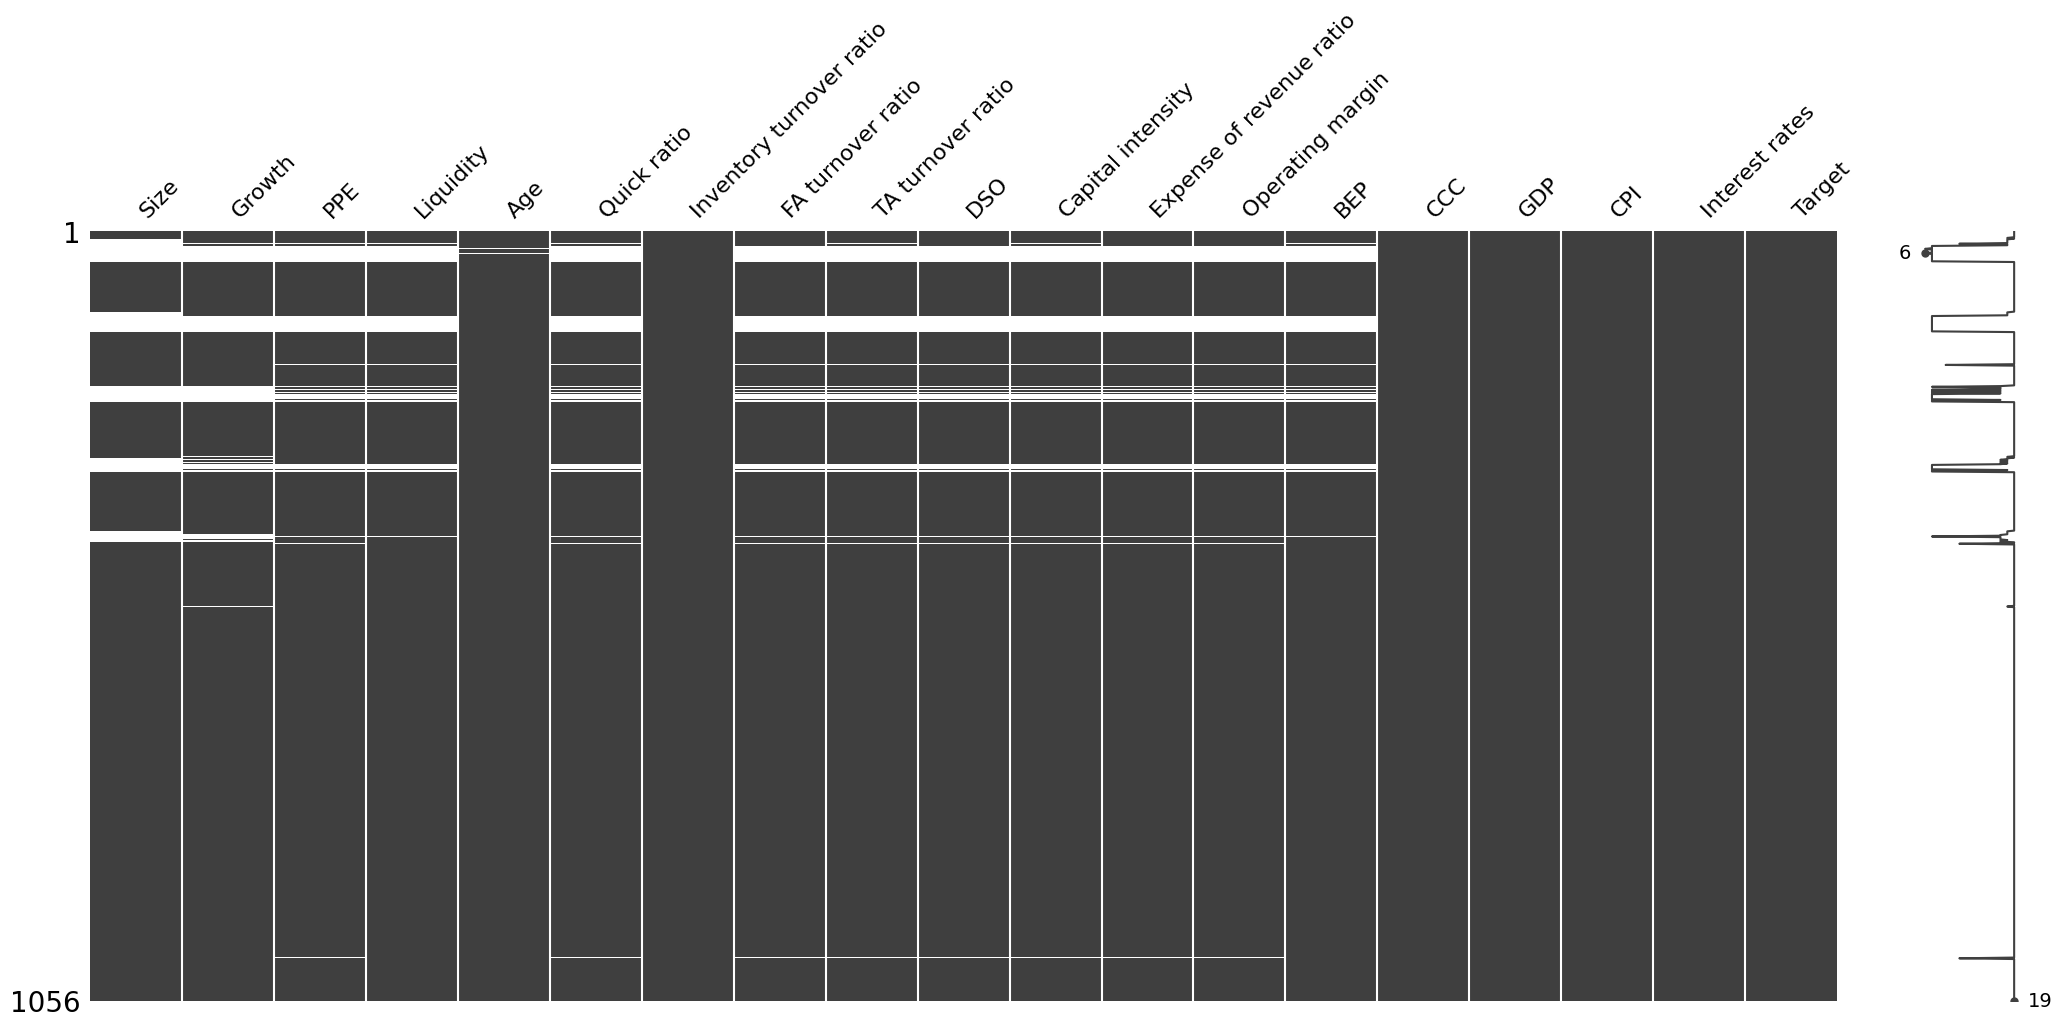

In [ ]:
import missingno

missingno.matrix(data)

In [ ]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(936, 19)
0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from sklearn import preprocessing

X = new_data.drop('Target', axis=1)
y = new_data.Target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [ ]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 74.47%
K-Nearest Neighbors: 70.21%
Decision Tree: 70.21%
Support Vector Machine (Linear Kernel): 73.94%
Support Vector Machine (RBF Kernel): 73.40%
Neural Network: 75.53%
Random Forest: 77.13%


In [ ]:
def random_forest_tuning(X_train, y_train, X_test, y_test):
# define parameter grid
    param_grid = {'n_estimators': [10],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)}
    # create grid search object
    grid = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5, scoring='accuracy')

    # fit grid search object to data
    grid.fit(X_train, y_train)

    # print results
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))

    # use best parameters to fit model to data
    rf = grid.best_estimator_
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred_rf = rf.predict(X_test)

    # print evaluation metrics
    print("\nRandom Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return rf

In [ ]:
from sklearn.decomposition import PCA

# instantiate PCA with n_components=10
pca = PCA(n_components=10)

# fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# create a new dataframe with the transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5",'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5",'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}
Best cross-validation score: 0.74

Random Forest:
[[89 21]
 [31 47]]
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       110
         1.0       0.69      0.60      0.64        78

    accuracy                           0.72       188
   macro avg       0.72      0.71      0.71       188
weighted avg       0.72      0.72      0.72       188



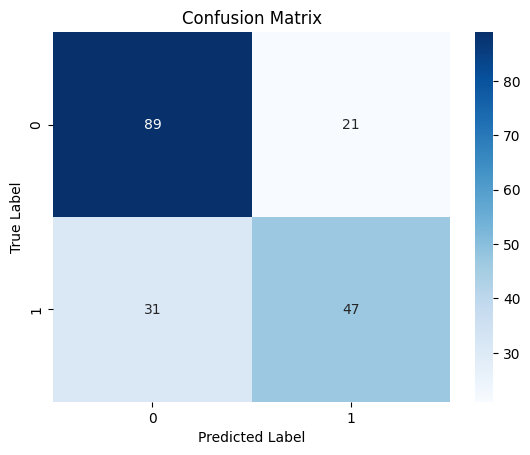

RandomForestClassifier(max_depth=6, min_samples_split=8, n_estimators=10,
                       random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train_pca_df, y_train, X_test_pca_df, y_test)

Best parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 10}
Best cross-validation score: 0.79

Random Forest:
[[90 20]
 [22 56]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       110
         1.0       0.74      0.72      0.73        78

    accuracy                           0.78       188
   macro avg       0.77      0.77      0.77       188
weighted avg       0.78      0.78      0.78       188



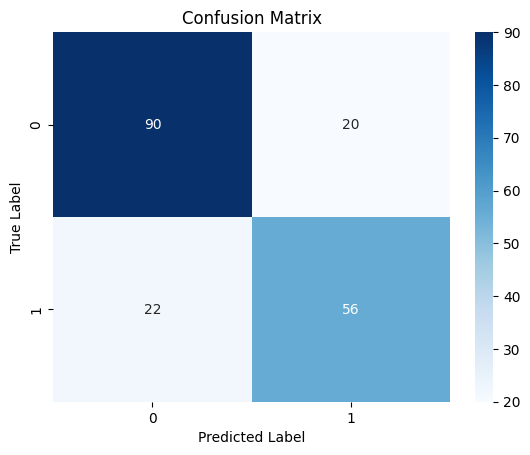

RandomForestClassifier(max_depth=7, min_samples_split=7, n_estimators=10,
                       random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train, y_train, X_test, y_test)

In [ ]:
# baseline
def baseline_model(X_train, y_train, X_test, y_test):
    baseline = LogisticRegression(random_state=38)
    baseline.fit(X_train, y_train)

    # predict on test set
    y_pred_baseline = baseline.predict(X_test)

    # print evaluation metrics
    print("\nLogistic regression:")
    print(confusion_matrix(y_test, y_pred_baseline))
    print(classification_report(y_test, y_pred_baseline))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, cmap="Blues", fmt="d",
                    xticklabels=["0", "1"],
                    yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # predict probabilities for test set
    y_pred_prob_baseline = baseline.predict_proba(X_test)[:, 1]

    # calculate ROC-AUC score
    roc_auc_baseline = roc_auc_score(y_test, y_pred_prob_baseline)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_baseline)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_baseline))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return baseline


Logistic regression:
[[93 17]
 [31 47]]
              precision    recall  f1-score   support

         0.0       0.75      0.85      0.79       110
         1.0       0.73      0.60      0.66        78

    accuracy                           0.74       188
   macro avg       0.74      0.72      0.73       188
weighted avg       0.74      0.74      0.74       188



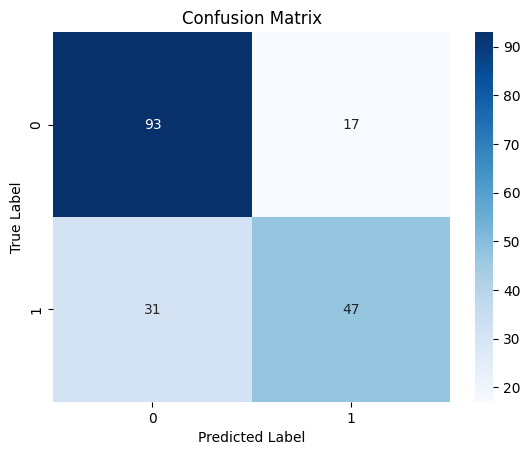

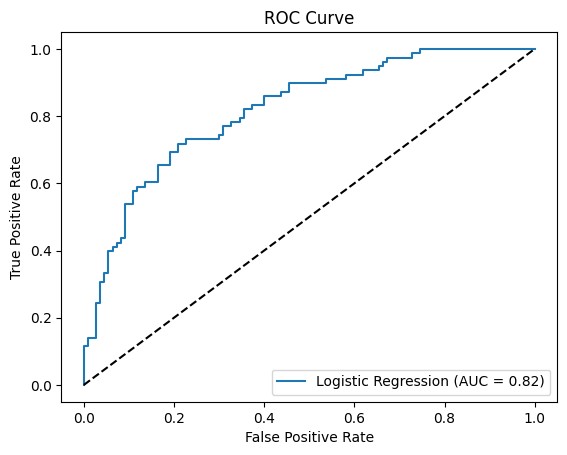

LogisticRegression(random_state=38)

In [ ]:
baseline_model(X_train, y_train, X_test, y_test)

In [ ]:
y_test.value_counts() / len(y_test)

0.0    0.585106
1.0    0.414894
Name: Target, dtype: float64

In [ ]:
y.value_counts() / len(y)

0.0    0.610043
1.0    0.389957
Name: Target, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 8 that accuracy is 0.685971100238935


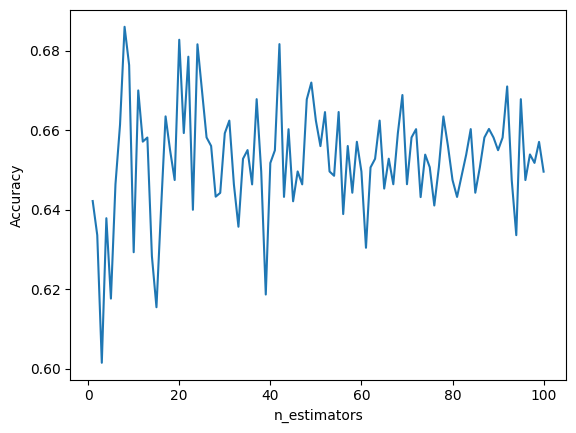

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 8 that accuracy is 0.685971100238935


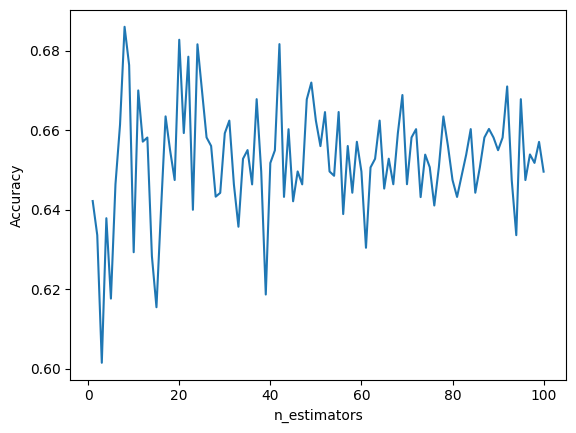

In [ ]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

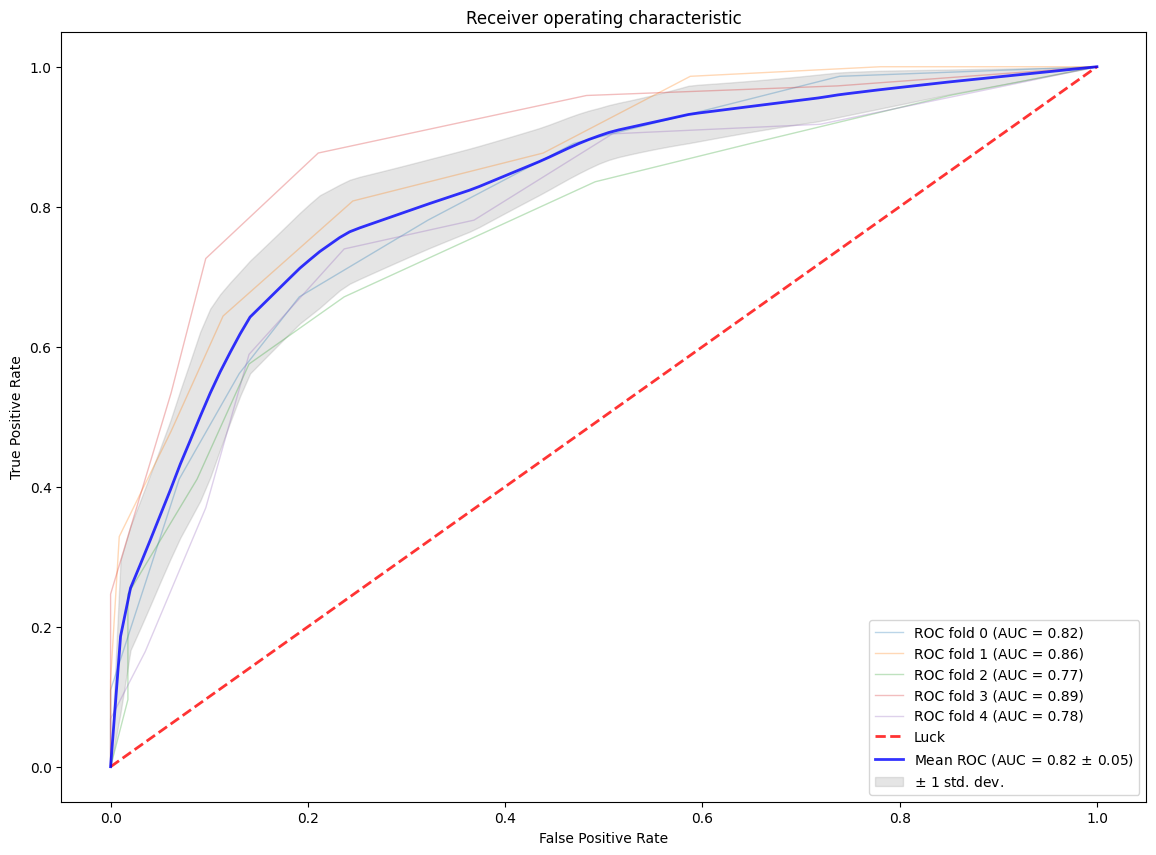

,AUC Train,AUC Test
0,0.999057,0.815485
1,0.998647,0.860791
2,0.999895,0.770548
3,0.998010,0.892273
4,0.999262,0.784847


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

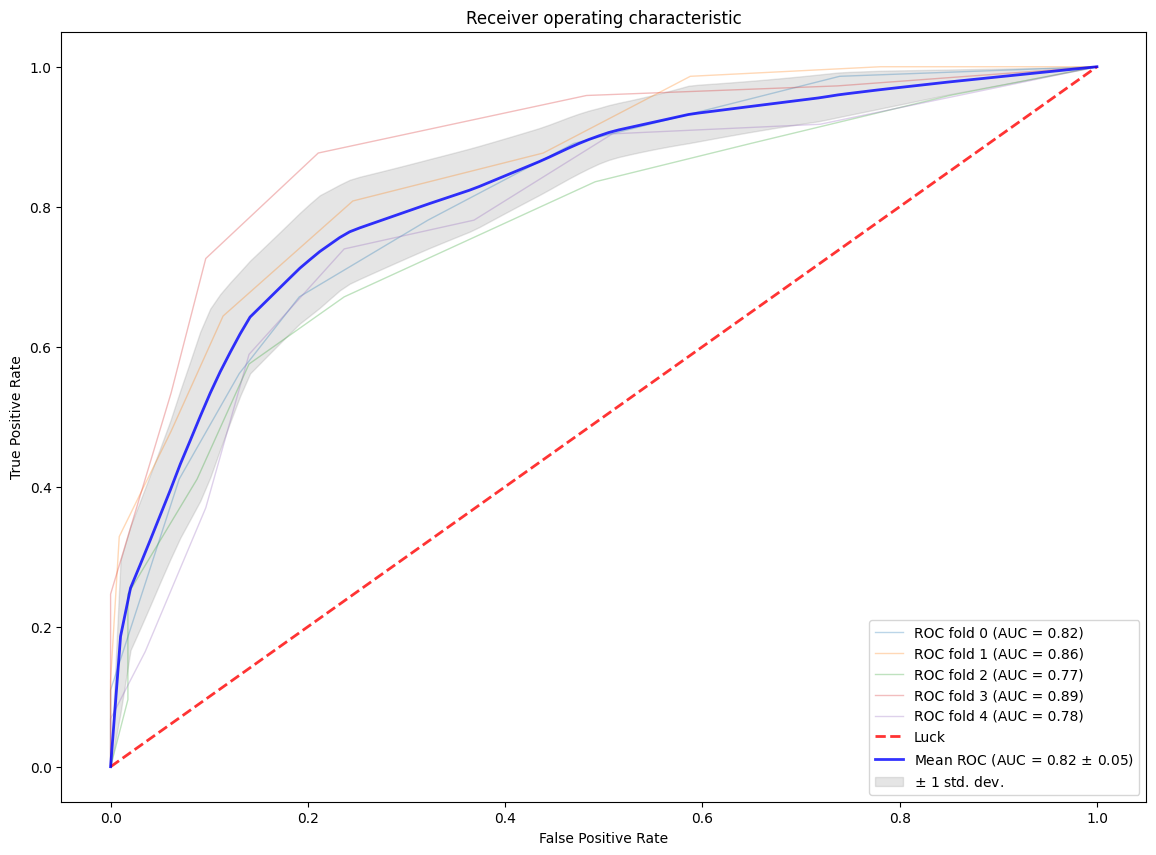

,AUC Train,AUC Test
0,0.999057,0.815485
1,0.998647,0.860791
2,0.999895,0.770548
3,0.998010,0.892273
4,0.999262,0.784847


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

BEP                         0.104191
Operating margin            0.086429
Liquidity                   0.084756
Expense of revenue ratio    0.080265
Growth                      0.080199
Size                        0.072123
FA turnover ratio           0.068261
PPE                         0.066792
DSO                         0.046993
Age                         0.044815
CCC                         0.044244
Inventory turnover ratio    0.041798
TA turnover ratio           0.039573
Capital intensity           0.033504
Interest rates              0.030886
Quick ratio                 0.030510
CPI                         0.023394
GDP                         0.021265
dtype: float64


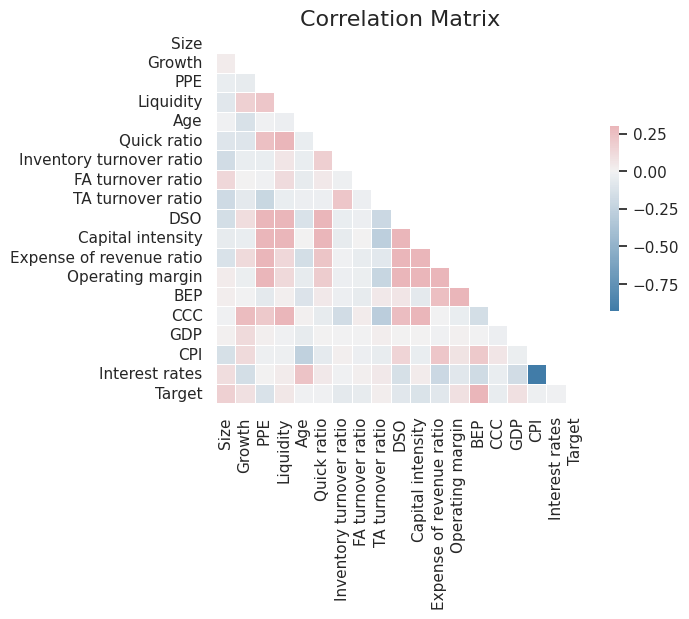

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

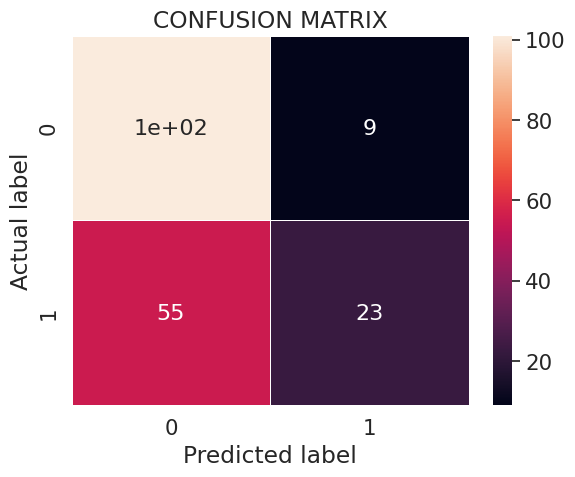

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76       110
         1.0       0.72      0.29      0.42        78

    accuracy                           0.66       188
   macro avg       0.68      0.61      0.59       188
weighted avg       0.68      0.66      0.62       188



In [ ]:
y_pred

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0.])